# 1. Classification as a prototype of machine learning technique

One typical example of machine learning is the classification problem. This is the process of attributing a "**class**" (or equivalently, a "**label**") to an object of an arbitrary type (e.g. a string, an image, or numbers) in order to catalogue it based on its **properties** (the actual information that we pass to the machine, e.g. the pixel intensities in the case of an image).

<center><img src="images/classification.png" width=500> 
Figure 1.1. Schematic classification in a 2D plot.<br>
(Credit: <a href="https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d"  target="_blank" rel="noopener noreferrer">Supervised vs. Unsupervised Learning, by Devin Soni</a>)</center>

## Types of Classifications

Classification can come in two major flavors, based on the type of intervention by the user:

- **Unsupervised**: The classification is defined "unsupervised" when the user does not provide labels during the training process and the machine learns the definition of each class from the data. This is exactly the case of "Clustering" that we saw in the previous session.  

>    _In practice, the machine learns to cluster objects with similar properties._


- **Supervised**: The classification is defined "supervised" when the user provides a label for each object in the training set. In this case, the idea is that we can train the model to associate the label with some given characteristics of the training data.

>    _In practice, the machine learns to find similarities between objects with the same label._

## Supervised classification - generative / discriminative classification

One approach to the classification problem involves the recognition of the function describing the density distribution of each class in the parameter space. This type of problem is called **generative classification** because it implies that we can find the distribution from which the data are generated (or better said, sampled).

**Discriminative classification** instead, includes any method which separates classes by "drawing" a boundary in the parameter space.

In the reminder, we will only focus on the latter type.

## 2. Classification algorithms overview

We start by presenting a set of [**sklearn**](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) algorithms with toy datasets, and then describe some of them. 

This serves as a showcase of the available methods and how they compare. You can easily adapt any of these methods to the following examples or your own problems. 

In [1]:
# # We provide the code fully here for completeness although it does not run
# # due to the fact that DecisionBoundaryDisplay function is in the experimental version

# ######################################################################################

# # Code source: Gaël Varoquaux
# #              Andreas Müller
# # Modified for documentation by Jaques Grobler
# # License: BSD 3 clause

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay

# # Generate toy dataset

# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [
#     make_moons(noise=0.3, random_state=0),
#     make_circles(noise=0.2, factor=0.5, random_state=1),
#     linearly_separable,
# ]

# # Setting up the classification algorithms (parameters)

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# # Running and plotting

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(datasets):
#     # preprocess dataset, split into train and test part
#     X, y = ds
#     X = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.4, random_state=42
#     )

#     x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)
#         DecisionBoundaryDisplay.from_estimator(
#             clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
#         )

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(x_min, x_max)
#         ax.set_ylim(y_min, y_max)
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             x_max - 0.3,
#             y_min + 0.3,
#             ("%.2f" % score).lstrip("0"),
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

<div style="text-align: center;">
<img src="images/sklearn_classification.png" width=1200> 
Figure 2.1. Overview of the clustering algorithms in sklearn
</img>
    </div>

## Quizz time: take a few moments and explore the results - what do you notice? 

Write some points here:

- point 1
- point 2




## Some important take-away points

<br>
<details>
    <summary> An indicative list: </summary>
<ul>
    <li> There is not a single best algorithm. 
    <li> Some algorithms are more able to separate classes.
    <li> Some algorithms have limited ability (e.g. the linear SVM with non-linear distributed data). 
</ul>
</details>

# 2. The sample for our classification example

To properly classify a star we need a spectrum. However, this is time consuming and limited to one (single slit spectroscopy) or a few tens of sources (multi-object spectroscopy). On the contrary, imaging in various different filters can be done easily and for thousands of sources per image. Photometry at different wavelengths result in a very low-resolution "spectrum".</br> 

<center><img src="images/Girardi2002-photometric systems.gif"> 
Figure 2.1. The filter+detector transmission curves for a number of different systems, along with indicative spectra of Vega, the Sun, and a M5 giant. <br>
(Fig 3. from <a href="https://ui.adsabs.harvard.edu/abs/2002A%26A...391..195G/abstract" target="_blank" rel="noopener noreferrer"> Girardi et al. (2002)]</a>)</center>

In this example we are using a set of photometric measurements (from optical to mid-IR bands) for a sample of massive evolved stars in the Large Magellanic Cloud (based on these works: [Bonanos et al. (2009) AJ, 138, 1003](https://ui.adsabs.harvard.edu/abs/2009AJ....138.1003B/abstract), [Neugent et al. (2012), ApJ, 749, 177](https://ui.adsabs.harvard.edu/abs/2012ApJ...749..177N/abstract), and [Davies, Crowther & Beasor (2018), MNRAS, 478, 313](https://ui.adsabs.harvard.edu/abs/2018MNRAS.478.3138D/abstract)). 

<center><img src="images/Massey2013-HRD.png" width=600> 
Figure 2.1. A slightly modified version of Fig. 1 from <a href="https://ui.adsabs.harvard.edu/abs/2013NewAR..57...14M/abstract" target="_blank" rel="noopener noreferrer"> Massey et al. (2013)]</a>)</center>

Our aim is to use a method that will help us **distinguish different classes** of objects. For our purposes we will use OBA stars (main-sequense objects), OBAe (a subcategory of OBA stars with circumstellar disks and emission lines), Wolf-Rayet stars (hot evolved stars with strong stellar winds that actually strip their envelopes), Yellow and Red supergiants (evolved massive stars). For convenience we will use OBA, OBAe, WR, YSG, and RSG, respectively, as labels.

&#9733; A similar, but more elaborated, implementation is performed in [Maravelias et al. (2022), arXiv: 2203.08125](https://arxiv.org/abs/2203.08125).



## Load and examine data


In [2]:
import numpy as np
import matplotlib.pyplot as plt

&#9755; You do not need ```pandas``` to do everything with files! ```genfromtxt``` is very powerful but has its tweaks! 

In [3]:
dfile = "data/LMC_phot_data.csv"
miss_value = -999.0  # when entries are missing

data = np.genfromtxt(dfile, dtype=None, 
                     comments='#', delimiter=',', 
                     filling_values = miss_value, 
                     names=True, autostrip='Yes')

#examine data
print("Let us see what we have:\n")
print("The column names:")
print(data.dtype.names)
print("-"*25)
print("Let's print the spectral types only:")
print(data['SpT'])
print("-"*25)

Let us see what we have:

The column names:
('Name', 'RAJ2000', 'DEJ2000', 'U', 'e_U', 'B', 'e_B', 'V', 'e_V', 'I', 'e_I', 'J', 'e_J', 'H', 'e_H', 'K', 'e_K', '36', 'e_36', '45', 'e_45', '58', 'e_58', '80', 'e_80', '24', 'e_24', 'SpT')
-------------------------
Let's print the spectral types only:
[b'WR' b'OBAe' b'OBA' ... b'YSG' b'YSG' b'YSG']
-------------------------


/tmp/ipykernel_308150/2479378192.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(dfile, dtype=None,


HINT: We want to group the different spectral classes found, and for this we are using the indeces and not the data values directly. in that way we can select all data for the same objects.

In [4]:
from collections import defaultdict

classes = defaultdict(list)

for i in range(0,len(data['SpT'])): 
#    print(i, data['SpT'][i].decode('utf-8'))
    classes[data['SpT'][i].decode('utf-8')].append(i)

#print(classes)
unique_cls = sorted(set(classes.keys()))
print(unique_cls)
print("> SUMMARY of loaded data:")
print("=========================")
for sptype in unique_cls:
    number = len(classes[sptype])
    print(f"{sptype:-<6s}--> {number:>3} stars")

['OBA', 'OBAe', 'RSG', 'WR', 'YSG']
> SUMMARY of loaded data:
OBA-----> 370 stars
OBAe---->  73 stars
RSG-----> 297 stars
WR------>  91 stars
YSG-----> 208 stars


In [5]:
bands = [b for b in data.dtype.names[3:-1] if 'e_' not in b]

def reminder():
    """ 
    A simple function to print all bands
    and classes available.
    """
    print('Available bands to use: ')
    print(','.join(bands))
    print('-'*25)
    print('Available classes to use:')
    print(','.join(unique_cls))

In [6]:
from astropy.table import Table, Column

print(f'Available photometry for: {", ".join(bands)}')     

# Constructing the table for the statistics 
phot_data_col_names = ['Class', 'All'] + [bb for bb in bands]
phot_data_per = Table( names = phot_data_col_names, dtype = ['S3']+['i4']+['f2']*(len(bands)))

for spt in unique_cls:
    indcs = classes[spt]
    starsWbands = defaultdict(list) # keep those with measurements across all
    for star in indcs:
#        print(spt, star)
        for bnd in bands:
            mag = data[star][bnd]
#            print(mag)
            if mag!=miss_value:
                starsWbands[bnd].append(star)    
    row_data_per = [spt, len(indcs)] + [(len(starsWbands[bb])/len(indcs))*100 for bb in bands]
    phot_data_per.add_row ( row_data_per )
    
print("\nNumber of stars per band (in %)\n")
phot_data_per    

Available photometry for: U, B, V, I, J, H, K, 36, 45, 58, 80, 24

Number of stars per band (in %)



Class,All,U,B,V,I,J,H,K,36,45,58,80,24
bytes4,int32,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16
OBA,370,77.3,78.94,78.94,73.5,96.5,97.56,97.0,99.2,97.8,93.5,60.28,2.703
OBAe,73,94.5,94.5,94.5,91.75,94.5,95.9,91.75,98.6,98.6,80.8,61.66,19.17
RSG,297,88.2,99.3,99.3,95.94,100.0,99.7,100.0,98.6,98.3,98.3,99.0,99.3
WR,91,85.7,87.94,87.94,83.5,91.2,93.44,90.1,97.8,98.9,94.5,72.5,4.395
YSG,208,95.7,100.0,100.0,85.56,100.0,100.0,100.0,100.0,100.0,100.0,95.7,100.0


&#9755; 36, 45, 58, 89, 24 corresponds to the 3.6um, 4.5um, 5.8um, 8.9um, 24um bands of *Spitzer*. One common representation of these bands is [3.6], [4.5], [5.8], [8.0], [24] but the use of "[]" and "." is inconvenient, so we drop them. 

## Question: What do you notice here ?

<br>
<details>
<summary>Click for answer</summary>
Many sources come without measurements across all filters. This is a particular problem for algortihms that need values to work with. 
    
This problem of <b>"missing values"</b> is actually the norm than the exception. There are ways to tackle this, e.g. by taking the mean values of the corresponding filters or more elaborated techinques. Check <a href="https://scikit-learn.org/stable/modules/impute.html" target="_blank" rel="noopener noreferrer">sklearn's imputation of missing values</a> for more.
</details>


## Visualize data - select features

In [7]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [8]:
def selmags( band1, band2, cls):
    """
    Function to select sources of a specific
    spectral class (cls) and return the magnitudes
    that correspond to bands 1 and 2.
        """
    # all indeces of the particular class
    cls_indcs = np.asarray( classes[cls] ) 
    # selecting those indeces of the class
    # that do not contain missing values, ie -999
    sel_cls_indcs = np.where( (data[band1][cls_indcs]!=miss_value)
                        & (data[band2][cls_indcs]!=miss_value) )[0]

    sel_indcs = cls_indcs[sel_cls_indcs]
    rem_indcs = len(cls_indcs)-len(sel_indcs)
    print(f'-- {cls}: excluding {rem_indcs} out of {len(cls_indcs)} sources ({rem_indcs/len(cls_indcs)*100:.1f}%)')
    mag1, mag2 = data[band1][sel_indcs], data[band2][sel_indcs]    
    
    return mag1, mag2

- plot1:
-- OBA: excluding 88 out of 370 sources (23.8%)
-- OBAe: excluding 8 out of 73 sources (11.0%)
-- RSG: excluding 2 out of 297 sources (0.7%)
-- WR: excluding 15 out of 91 sources (16.5%)
-- YSG: excluding 0 out of 208 sources (0.0%)

- plot2:
-- OBA: excluding 18 out of 370 sources (4.9%)
-- OBAe: excluding 6 out of 73 sources (8.2%)
-- RSG: excluding 5 out of 297 sources (1.7%)
-- WR: excluding 9 out of 91 sources (9.9%)
-- YSG: excluding 0 out of 208 sources (0.0%)


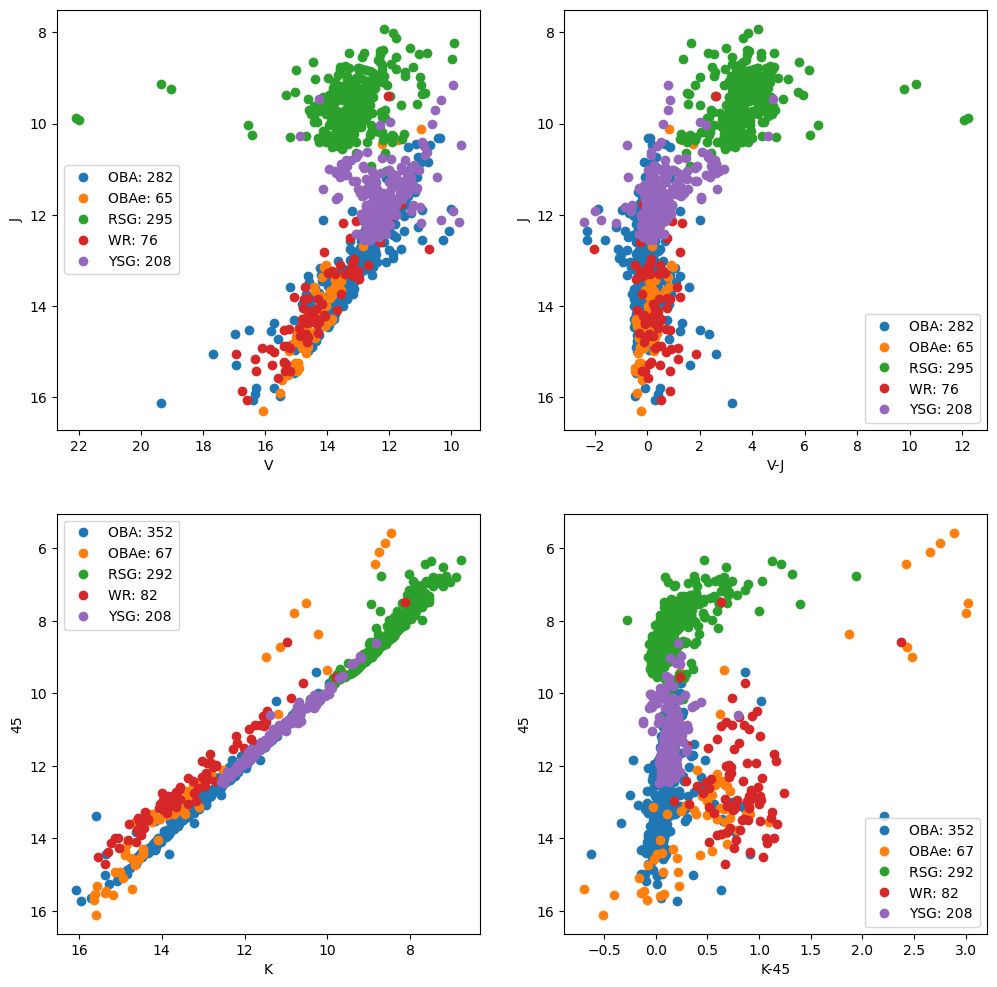

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))

selected_spt = unique_cls              # if you want to print all
#selected_spt = ['RSG', 'OBA', 'WR']     # put your selection here

# plot 1
band1_1 = 'V'
band1_2 = 'J'

# plot 2
band2_1 = 'K'
band2_2 = '45'

print('- plot1:')
for s in selected_spt: 
    plt1 = selmags( band1_1, band1_2, s)

    ax[0,0].plot(plt1[0], plt1[1], 'o', label=f'{s}: {len(plt1[0])}')
    ax[0,0].set_xlabel(f'{band1_1}') #'-{band1_2}')
    ax[0,0].set_ylabel(band1_2)
    ax[0,0].invert_yaxis()
    ax[0,0].invert_xaxis()
    ax[0,0].legend()

    ax[0,1].plot(plt1[0]-plt1[1], plt1[1], 'o', label=f'{s}: {len(plt1[0])}')
    ax[0,1].set_xlabel(f'{band1_1}-{band1_2}')
    ax[0,1].set_ylabel(band1_2)
    ax[0,1].invert_yaxis()
    ax[0,1].legend()
    
    
print()
print('- plot2:')        
for s in selected_spt:
    plt2 = selmags( band2_1, band2_2, s)
    ax[1,0].plot(plt2[0], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
    ax[1,0].set_xlabel(f'{band2_1}') #'-{band2_2}')
    ax[1,0].set_ylabel(band2_2)
    ax[1,0].invert_yaxis()
    ax[1,0].invert_xaxis()    
    ax[1,0].legend()
    
    ax[1,1].plot(plt2[0]-plt2[1], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
    ax[1,1].set_xlabel(f'{band2_1}-{band2_2}')
    ax[1,1].set_ylabel(band2_2)
    ax[1,1].invert_yaxis()
    ax[1,1].legend()
    

plt.show()

## Play time: Experiment with various combinations and try to answer

### 1. What happens if you start increasing the number of classes to consider ?
<br>
<details>
<summary>Click for answer</summary>
The task becomes more difficult as classes start to overlap. Some combinations may prove better to separate some classes but there is not a single one.      
</details>
    
### 2. How the selection of bands influence the objects to keep ? 
<br>
<details>
<summary>Click for answer</summary>
In order to plot a CMD we need sources with measuremets in both bans. By enforcing this we actually exclude objects with missing data. That results in decreasing number of sources.
</details>

### 3. Would you prefer to use  combinations with few or more objects ?
<br>
<details>
<summary>Click for answer</summary>
Since with supervised methods we require a training sample, i.e. a set of objects from which the algorithm will "learn" the properties of each class, we would like to maximize the number of sources used. In problems with already small numbers (like in this example) this becomes even more critical.
</details>

# 3. Support Vector Machine (SVM)

Support vector machine (SVM) is a way of choosing a decision boundary between different classes.

The classification boundary is provided by the hyperplane maximizing the distance between the hyperplane itself and the closest point from either class. This distance is called **margin**. Points on the margins are called **support vectors**.


<center>
<table><tr>
    <td width=400>
        <img src="images/SVM_1.png">
    </td>
    <td width=400>
        <img src="images/SVM_2.png">
    </td>
</tr></table>
    Figure 3.1. Left: Hyperplane (dashed line) separating two classes (_red_ and _green_). Right: The closest points to the hyperplane from each class constitute the "tip" of the support vectors.
</center>

The left panel of Figure 3.1 a shows two different classes distributing in a scatter plot according to variable $x_1$ and $x_2$. The right panel of Figure 3.1 explains the origin of the name support vectors: the closest points _support_ the hyperplanes (solid lines) equally distant from the decision hyperplane (dashed line).

Infinite possible boundaries can separate the two classes. SVM algorithms find the one that maximizes the distance between the supported hyperplanes.

## Hyperplanes and decision boundary

The supported hyperplanes (solid-lines in Figure 3.1) can be defined as:

> w$\cdot$x + b = +1
>
> w$\cdot$x + b = -1

where x is the coordinate on the (x1, x2) plane, w is a 2$\times$1 matrix and b a scalar. It turns out that these hyperplanes are separated by a distance 2 / ||w||. Finding the ideal classification boundary, i.e. the one maximizing the distance, is therefore a problem of minimizing the norm ||w||. This is what SVM algorithms do.

&#9733; For a complete mathematical formulation, consult the [Idiot’s guide to Support vector
machines, by Robert Berwick]( http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf).

## Separatable classes (or not)

We cannot always assume that 2 classes are separable without "contamination". That is why SVM algorithms includes a tunable parameter ($C$) which penalizes misclassifications.


<div style="text-align: center;">
<img src="images/svm-parameter-c-example.png" width=800> 
Figure 3.2. The effect of <i>C</i> parameter in the misclassifications.<br>
(Credit: <a href="https://learnopencv.com/svm-using-scikit-learn-in-python/"
 target="_blank" rel="noopener noreferrer">SVM: What makes it superior to the Maximal-Margin and Support Vector Classifiers?, by Shivam Sharma</a>)
    </img>
    </div>
    
- Small $C$ &#8594; wide margin &#8594; allows more misclassification <br>
- Large $C$ &#8594; narrow margin &#8594; allows less misclassification    

However, the SVM finds the hyperplane that maximizes the margin, and indirectly minimizes the misclassifications. In other words, SVM is not designed to minimize the contamination _per se_.


## Multiple classes

The SVM method can be applied for multiple classes as well.

<center><img src="images/svm_many_classes.png" width=400> 
Figure 3.3. SVM applied to 3 different classes.<br>
</center>

## Multiple dimensions

If our sample characterized by three parameters (X, Y, Z), then the scatter plot has 3 dimensions. The boundary between the classes in the 3-D plot is a plane. Because of the fact that the method can be extrapolated at N-dimensions, the boundary is a *hyperplane*.

<img src="images/svm_3d.png" width=400>
<center>
    Figure 3.4: Support vector machine applied for 3-D features and three classes.
</center>

## Non-linear boundaries

Sometimes, linear boundaries may not be optimal and a non-linear SVM should be used instead. The left panel of Figure 3.5 shows an 2D scatter plot of two different classes (e.g. red and green stars with different radii and temperatures) which cannot be linearly separated.

In order to find non-linear boundaries we can tackle the problem in an higher dimensional space. We use a process called **kernelization**, which consists in using a kernel function to attribute to our data a value in the additional dimension. Then, we draw the decision hyperplane into this higher dimensional space.

The central panel of Figure 3.5 shows that once the 2D data are mapped to a 3D space by attributing a $z$ value through a Gaussian-like function, the classes are easily separable by a 3D hyperplane. Projecting back the plane in 2D, we obtain the non-linear boundary (Figure 3.5, rght panel).

<img src="images/kernel.png" width=800>
<center>
    Figure 3.5. When no linear boundaries can be used the SVM method can be applied by using kernel.
</center>

## Choosing the kernel function

Useful kernel functions shall satisfy specific conditions, so that in practice only a few are used. In the example of Figure 3.5, the Gaussian Radial Basis Function is used:

> $K(x,y) = e^{-\gamma(x-y)^2}$

where $\gamma$ is a hyperparameter which shall be learned (in our example we use an arbitrary value but in principle we should use cross-validation methods).

## Final remarks on SVM

**Pros**
* Good at dealing with high dimensional data
* Works well on small data sets

**Cons**
* Picking the right kernel and parameters can be computationally intensive
* It suffers from contamination

&#9733; For further information on SVM, consult [Support Vector Machine - Classification, by Saed Sayad](http://www.saedsayad.com/support_vector_machine.htm).

# 4. Application 1: SVM in practice

## The binary problem

In this case we examine a binary classification problem where we select one class (or more that are groups into a single oen) and the rest as contaminants. The purpose is to check if we can separate efficinetly these two classes.

In [10]:
def process_data( bands2use, binary_classes2use  ):
    """
    Process input data to return arrays 
    of magnitudes and (consecutive) colors
    based on the input bands (band2use).

    Option to prepare data for binary classification
    if binary_classes2use contains classes or not.
    
    """
    pd_ml_data_mags = []   # working with magnitudes directly
    pd_ml_data_clrs = []   # taking color terms, i.e. mag1-mag2
    pd_ml_labels    = []
    pd_ml_objects   = []

    print(f'# stars with mags in: {",".join([bb for bb in bands2use])}')
    print("=========================")
    print("Type    initial    final ")
    print("-------------------------")
    init = 0 # initial total number of stars (added after each iteration)

    for sptype in unique_cls:
        indcs = classes[sptype]
        kept = []
        init += len(indcs)
        for star in indcs:
            mag_list = list(data[star][bands2use])
            # rejecting stars with missing values
            if miss_value in mag_list:
                #print('REJECTING!!! <',data[star])
                continue
            else:
                # creting the magnitude list
                mag = [ i for i in mag_list ] #data[star][bands_selected] ]

                # creating the color term (index)
                clr = [mag[i]-mag[i+1] for i in range(len(mag)-1)]

                pd_ml_data_clrs.append(clr)
                pd_ml_data_mags.append(mag)
                pd_ml_objects.append(data[star]['Name'])
                kept.append(sptype)           

                # selecting class(es) to examine for binary classifier
                if len(binary_classes2use)!=0:
                    if sptype in binary_classes2use:
        #                print(f'. keeping {sptype}')
                        label_sptype = 'SEL'
                    else: 
        #                print(f'. not considering {sptype}')
                        label_sptype = 'CON'
                    pd_ml_labels.append(label_sptype)
                else:
                    pd_ml_labels.append(sptype)

        print(f'{sptype:<4}  {len(indcs):>9} {len(kept):>8}')
    print('-'*24)
    print(f'TOTAL:  {init:>7}  {len(pd_ml_data_mags):>7}') 
    if len(binary_classes2use)!=0:
        print('='*24)
        print(f'classifying:  {len(pd_ml_labels)-pd_ml_labels.count("CON"):>10}') 
        print(f'contaminants:  {pd_ml_labels.count("CON"):>9}') 


    pd_ml_data_mags = np.asarray(pd_ml_data_mags)
    pd_ml_data_clrs = np.asarray(pd_ml_data_clrs)
    pd_ml_objects   = np.asarray(pd_ml_objects)
    pd_ml_labels    = np.asarray(pd_ml_labels)
          
    return pd_ml_data_mags, pd_ml_data_clrs, pd_ml_objects, pd_ml_labels

In [11]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


Select here the class(es) you would like to distinguish from the rest, along with the bands to use.

In [12]:
class2keep = ['RSG']
# Select the bands you want to use here:
bands_selected = ['V', 'J'] 

In [13]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected, class2keep)  

# stars with mags in: V,J
Type    initial    final 
-------------------------
OBA         370      282
OBAe         73       65
RSG         297      295
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      926
classifying:         295
contaminants:        631


NOTE:the process_data() function examines and keeps only the sources with values across all bands. In other words, we remove sources with missing values (according to the bands selected). 

Lets print the labels to see how they look like.

In [14]:
print(ml_labels)

['CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'C

NOTE: If you have more than 2 bands selected the following plot will use the first two. Modify accordingly to plot other combinations.

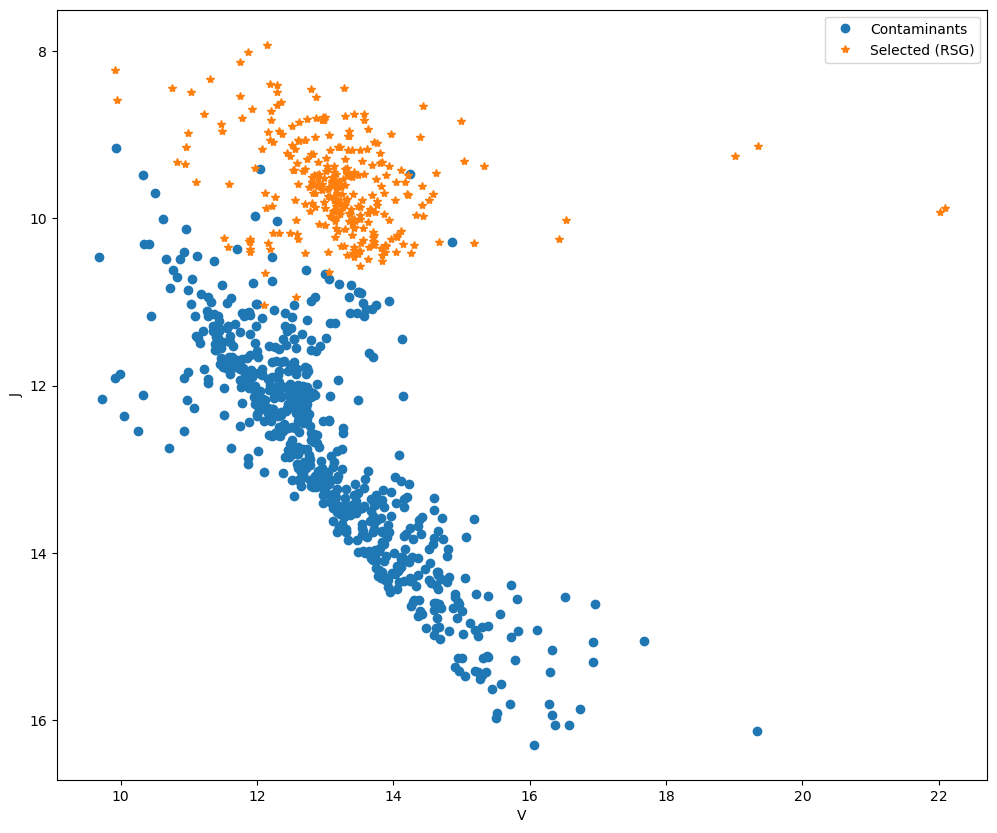

In [15]:
fig = plt.figure(figsize=(12,10))

conts = np.where( ml_labels=='CON' )[0]
clasf = np.where( ml_labels!='CON' )[0]

plt.plot( ml_data_mags[conts][:,0], ml_data_mags[conts][:,1], 'o', 
             label='Contaminants')
plt.plot( ml_data_mags[clasf][:,0], ml_data_mags[clasf][:,1], '*', 
             label=f'Selected ({"+".join(class2keep)})')
plt.gca().invert_yaxis()

plt.xlabel(f'{bands_selected[0]}') #'-{bands_selected[1]}')
plt.ylabel(bands_selected[1])
plt.legend()
plt.show()


## Introducing train-test split

In supervised approaches we want to "teach" the algorithms what they need to learn, before start the predictions. In this case we want the SVM to identify the common properties of the two sub groups (SEL including all possible classes used, and CON as contaminants). However, if we provide all data the algorithm will learn this "by heart" and fit them perfectly (called **overfitting**), and when new data appear will probably misclassify. 

To address this, and to have a way to estimate the performance of the algorithms a standard **train-test split** it performed. As much data as possibly should enter the training sample, with typical values being 70-80%. Then, what is left is treated as a test sample, i.e. data that are not used to train the model. 

<div style="text-align: center;">
<img src="images/train-test-split.png" width=600> 
Figure 4.1. Splitting the sample into training and test sets. <br>
(Credit: G. Maravelias)
    </img>
    </div>

A better approach is to split the whole sample into **train**, **validation**, and **test** sets. In this way train set defines the model's parameters, while from the validation sample we can get the *hyperparameters* (those parameters whose values determine the learning process), and finally the test sample to evaluate the performance. We will see this and more advanced techniques to estimate performance in the next sessions (ML_Practices).



In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels, 
                        test_size=0.3) #, random_state=42) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (training)')
print(f'   {len(X_test)} (test)') 
print()
print(f'Test labels: {y_test}')


- From 926 sources:
   648 (training)
   278 (test)

Test labels: ['SEL' 'SEL' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON'
 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL'
 'SEL' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON'
 'CON' 'SEL' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'SEL' 'SEL'
 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'SEL'
 'SEL' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'SEL'
 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'SEL' 'CON' 'SEL' 'CON'
 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL'
 'CON' 'SEL' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'CON' 'CON'
 'CON' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'SEL' 'SEL' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CO

Now, let's use the classifier to fit our training set (X_train) and predict the classes of the test xamples (X_test). We will print some metrics to check the performance.

In [17]:
from sklearn import metrics

clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#print(y_pred)

print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

Classification report:

               precision    recall  f1-score   support

         CON       0.98      0.96      0.97       186
         SEL       0.93      0.97      0.95        92

    accuracy                           0.96       278
   macro avg       0.96      0.96      0.96       278
weighted avg       0.96      0.96      0.96       278

Confusion matrix: 

 [[179   7]
 [  3  89]]


## Model evaluation metrics

There is a number of assessment metrics for the performance of a classifier. We start by introducing the idea of the **confusion matrix**. 

<center><img src="images/confusion_matrix-mod.png" width=400> 
Figure 4.1. Confusion matrix for classification.<br>
(Credit: <a href="https://towardsdatascience.com/precision-vs-recall-386cf9f89488"  target="_blank" rel="noopener noreferrer">Precision vs Recall by Shruti Saxena</a>)</center>


Defining some metrics:

$$ \rm{Precision} =  \frac{\rm{True~Positives}}{\rm{Actual~Results}} = \frac{\rm{True~ Positives}}{\rm{True~Positives\,+\,False~Positives}} $$ 

$$ \rm{Recall} = \frac{\rm{True~Positives}}{\rm{Predicted~Results}} = \frac{\rm{True~ Positives}}{\rm{True~Positives + False~Negatives}} $$ 

$$ \rm{F1-score} = 2 \times \frac{\rm{Precision}\times\rm{Recall}}{\rm{Precision}+\rm{Recall}}$$

$$ \rm{Accuracy} = \frac{\rm{True~Positives}\,+\,\rm{True~Negatives}}{\rm{Total}} $$ 

<br>
<div style="text-align: center;">
Support: number of test objects per class<br><br>
Macro avg: averaging the unweighted mean per label<br><br>
Weighted avg: averaging the support-weighted mean per label
</div>

---

Note 1: You may also encounter the terms _sensitivity_ and _specificity_ which corresponds to the recall of the positive and the negative class, repsectively, in binary problems. 

Note 2: In astrophysics we use the terms _completeness_ and _contamination_ (see [Classification, by Andy Connolly](http://connolly.github.io/introAstroML/blog/classification.html)):

$$ \rm{completeness} = \frac{\rm{True~Positives}}{\rm{All~real~Positives}} = \frac{True~Positives}{True~Positives + False~Negatives} = recall$$

$$ \rm{contamination} = \frac{False~Positives}{All~detected~Positives} = \frac{False~Positives}{True~Positives + False~Positives}$$



A prettier presentation of the same results...

In [18]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
                  
                  
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, alpha=0.5)
#    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('# sources', fontsize=16)
    cbar.ax.tick_params(labelsize=16) # (fontsize=15)
   

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize=15)
        plt.yticks(tick_marks, target_names, fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center", color="black", fontsize=14 )
                     #color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center", color="black") 
#                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label (accuracy={:0.2f})'.format(accuracy, misclass), fontsize=16)
    plt.show()


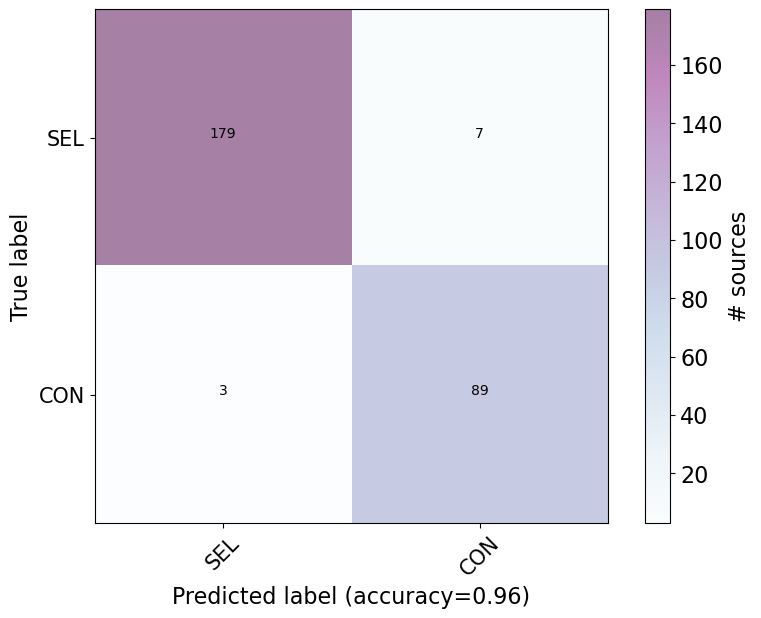

In [19]:
plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      ['SEL','CON'],
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns precent, False raw numbers
                      ) # YlOrBr


## Question: What happens if we start adding more classes into the selected one ?
<br>
<details>
<summary>Click for answer</summary>
The accuracy drops as more classes results in a more complex problem and the classes may overlap in the feature space (confusing the classifier even more!).
</details>

## Question: What happens when we start changing the $C$ parameter? 

HINT: the default value is 1, so start increasing it. 
<br>
<details>
<summary>Click for answer</summary>
A lower value off C allows for more misclassifications, i.e. more sources are found away from the diagonal in the confusion matrix. As we increase its value the decrease but we will lose in prediction power.  
</details>

## The multi-class problem

Now we approach the same problem as a multi-class one, i.e. we are using the SVM as a classifier that can handle all classes simultaneously. 

In [20]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [21]:
bands_selected = ['V', 'J'] 

In [22]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected,[])  

# stars with mags in: V,J
Type    initial    final 
-------------------------
OBA         370      282
OBAe         73       65
RSG         297      295
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      926


Now if we print the labels again, we notice that the array is totally different and the multiclass output is evident.

In [23]:
print(ml_labels)

['OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'O

## Splitting into train and test sets for multi-class

We are using again the train-test split approach but considering all classes now.

In [24]:
indices = np.arange(len(ml_labels))
X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels,
#                                shuffle=True, stratify=ml_labels, 
                                test_size=0.3 ) #, random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

print('\nStatistics per class:')
k = 0
for c in unique_cls:
    items_train = np.where( y_train==c )[0]
    items_test  = np.where( y_test==c )[0]
    items_total = np.where( ml_labels==c )[0]
    print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')



> From 926 sources we use 648 for training and 278 for testing.

Statistics per class:
> For OBA there are 282 sources split in 188 (train) and 94 (test) samples
> For OBAe there are 65 sources split in 38 (train) and 27 (test) samples
> For RSG there are 295 sources split in 218 (train) and 77 (test) samples
> For WR there are 76 sources split in 53 (train) and 23 (test) samples
> For YSG there are 208 sources split in 151 (train) and 57 (test) samples


## Play time: Run train-test split a few times as it is  - do you notice anything strange? 

HINT: try to reduce the test_size, for the evidence to become clearer. 
<br>
<details>
<summary>Click for answer</summary>
It is possible to get 0 test objects for some classes. This is due to the randomness of the selection and the low number of sources in some of the classes. 
</details>


## How can we correct for the effect in the previous question?

HINT: Check the documentation and find out which parameters help.
<br>
<details>
<summary>Click for answer</summary>
Add shuffle=True and stratify ensures that the test sample will keep the demographics of the original one. 
</details>

### Important take-away 

> **sklearn documentation is your friend !**

Classification report:

               precision    recall  f1-score   support

         OBA       0.60      0.80      0.68        94
        OBAe       0.00      0.00      0.00        27
         RSG       1.00      0.99      0.99        77
          WR       0.00      0.00      0.00        23
         YSG       0.65      0.88      0.75        57

    accuracy                           0.72       278
   macro avg       0.45      0.53      0.48       278
weighted avg       0.61      0.72      0.66       278

Confusion matrix: 

 [[75  0  0  0 19]
 [25  0  0  0  2]
 [ 0  0 76  0  1]
 [18  0  0  0  5]
 [ 7  0  0  0 50]]


/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

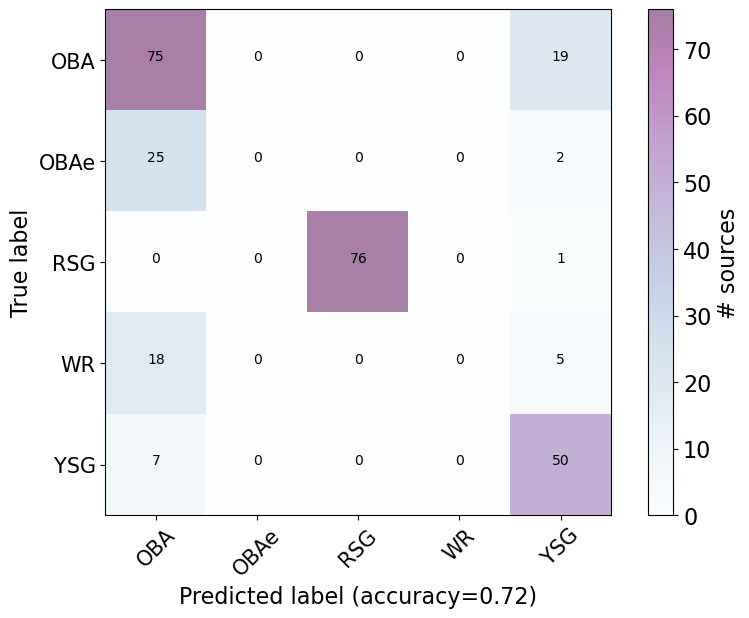

In [25]:
clf2 = SVC(kernel='linear') 
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
#print(y_pred)

#confmatrix = metrics.confusion_matrix( y_test, y_pred)
print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      unique_cls,
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns precent, False raw numbers
                      ) # YlOrBr

## Question: How does the result changes with respect to the binary case? 
<br>
<details>
<summary>Click for answer</summary>
We see a drop in the accuracy, because we try to classify more classes which are actually not easilly separated in the feature space. In other words some classes may have similar magnitudes and colors, which makes it difficult to separate them. 
</details>


## Question: How does the result change with kernel ? 

HINT: check sklearn.svm.SVC
<br>
<details>
<summary>Click for answer</summary>
Adding more classes (and bands) increases the dimensionality of the problem, therefore, there is a more complex representation of the input data. Kernels help to fit them more efficiently since they are able to "see" in more dimensions.   
</details>
    

## Take-away point

> Accuracy is **not** the best metric to use when we have imbalanced datasets. 

# 5. Random Forest

## Decision Tree

A **Decision Tree** (**DT**) is simply a top-to-bottom tree-like structure where each node corresponds to a question (or a set of features more generally) that distinguishes objects to two groups, left and right from the node. A decision tree presents the drawback of learning extremely well the training set. That means that DTs overfit the data and they cannot predict very accurately new data.

<center><img src="images/DecisionTree.jpg/" width=400> 
Figure 5.1. Quick introduction to Decition Trees - how to fulfill an everyday need.<br>
(Credit: G. Maravelias)</center>
 

##  Random Forests

**Random Forests** (**RF**) or Random Decision Trees ([Breiman (2001), Machine Learning, 45, 5](https://doi.org/10.1023/A:1010933404324)) is a generalization of the DTs, as it utilises a multitude of decision trees. When RF are used as a classification method, for each input datum the final output is the class (/value) given by the mode of the classes of the individual trees.


<center><img src="images/RandomForests.jpg" width=800> 
Figure 5.2. Schematic description of the Random Forest classifier.<br>
(Credit: G. Maravelias)</center>


RF creates a large number of DTs through random selection of a subset of the training set as well as a random selection of features. This randomness reduces the correlation between the different DTs. Since the DTs have different conditions in their nodes and different overall structures, this diversity yield overall robust predictions. 

Once the RF has been trained, the data of an **unlabeled** source (to be classified) are  fed into all DTs of the forest. According to its properties and the nodes in each DT, it follows a specific path which leads to a given class. The final output of the RF (the prediction) is an aggregation of all DTs by means of a majority vote.

The fact that RF combines the prediction for a number of individual trees makes it an **ensemble** method.

&#9733; [Reis, Baron, & Shahaf (2019), AJ, 157, 16](https://ui.adsabs.harvard.edu/abs/2019ascl.soft03009R/abstract) provide an excellent description of RFs (for a two-class problem) and present a  probabilistic RF method which takes into account the uncertainties on the data and their labels.

## Final remarks on Random Forests

In machine learning most of the effort is actually spent on the **sample** selection and, most importantly, on the selection of the **features** used for the classification (feature engineering).

RF partially overcome the latter problem by training each DT on a different sub-set of features, hence training the algorithm to recognize the features which mostly differentiate the objects.

**PROS**
- No need of scaling or transformation of the initial data.
- Implicit feature selection.
- Suitable for large datasets with many features.


**CONS**
- Not easily interpretable.
- Hyperparameter needs good tuning for high accuracy.  

# 6. Application 2: Random Forests in practice

Using the same dataset we are not approaching the same problem using the Random Forest (both as a binary and a multiclass classifier).

---

**TASK 1: Complete the train-test split and select magnitudes to work with.**

**TASK 2: Find the proper function for RF and make predictions**

In [26]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [27]:
class2keep_RF=['RSG']  # add any class if you want to use RF as binary classifier, or keep it []
bands_selected_RF = ['U','V', 'I', 'J', 'K','36'] #, '36um', '58um'] 

In [28]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF, class2keep_RF)  

# stars with mags in: U,V,I,J,K,36
Type    initial    final 
-------------------------
OBA         370      252
OBAe         73       60
RSG         297      249
WR           91       70
YSG         208      172
------------------------
TOTAL:     1039      803
classifying:         249
contaminants:        554


In [29]:
# splitting data on magnitudes or colors

#X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, 
X_train, X_test, y_train, y_test = train_test_split(ml_data_clrs, 
                                                                ml_labels,
#                                shuffle=True, stratify=ml_labels, 
                                test_size=0.3) #,  random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

# check if in binary or multi-label mode
if 'CON' in ml_labels: # binary
    confmat_classes = class2keep_RF+['CON']
else:
    confmat_classes = unique_cls

    print('\nStatistics per class:')
    k = 0
    for c in unique_cls:
        items_train = np.where( y_train==c )[0]
        items_test  = np.where( y_test==c )[0]
        items_total = np.where( ml_labels==c )[0]
        print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')


> From 803 sources we use 562 for training and 241 for testing.


Classification report:

               precision    recall  f1-score   support

         CON       0.96      0.99      0.98       166
         SEL       0.99      0.92      0.95        75

    accuracy                           0.97       241
   macro avg       0.98      0.96      0.97       241
weighted avg       0.97      0.97      0.97       241

Confusion matrix: 

 [[165   1]
 [  6  69]]


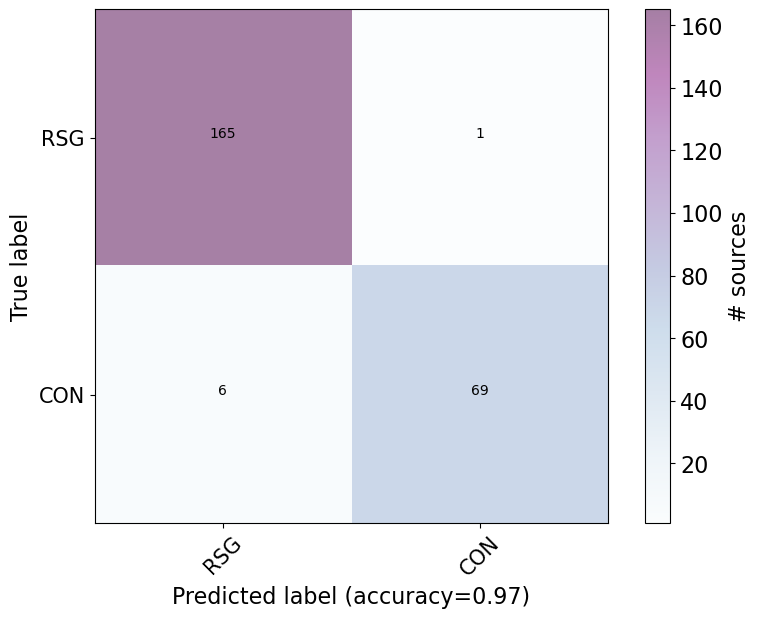

In [30]:
from sklearn.ensemble import RandomForestClassifier

clfrf = RandomForestClassifier()
clfrf.fit(X_train, y_train)
y_pred = clfrf.predict(X_test)

print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      confmat_classes,
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns percent, False raw numbers
                      ) # YlOrBr

## Question:  Why the results change by re-running it ?
<br>
<details>
<summary>Click for answer</summary>
RF as the name suggest create always a different set of trees with random eselection of features and data. Consequently, the RF from one run to the other is not the same and there are small variations. However, the results are robust because they are averaging the results from all trees. 
</details>


## Question:  What is the difference on the accuracy of the algorithm if we use the colors instead of the magnitudes? Why do it?
<br>
<details>
<summary>Click for answer</summary>
Depending on the classes and bands selected the accuracy will (slightly) change. RF are rather insensitive to the input data (scaled or not). 
    
However, colors are distance-independent features, which means that a model build with these features could be applicable to other galaxies also. Colors are distance-independent features, which means that the model could be applicable to other galaxies also. On the contrary, if we use only magnitudes this would mess up the prediction as with distance the sources become fainter.  
</details>

# 7. k-Nearest Neighbors (KNN) classification

k-NN is an unsupervised method to identify clusters. Given the results from this algorithm we can then use it to perform classification. In other words, we can attribute any (new point) to the class which dominates its surroundings. 

The problem is then how to define the "neighborhood" of a point. The trivial solution would be to set a fixed radius. The issue then becomes its size: if too small, we **will not find neighbors** for "satellite" points at the edge of a class cluster; if too large, we **will lose resolution** in dense parts, effectively throwing away information. Therefore, ideally we would like to have a *variable bandwidth* selection threshold.

> One solution is to use a local average of the labels of the $k$ nearest neighbors:
>
> $y = \frac{1}{k} \sum￼_{x_i \in N_k(x)} y_{i}$
>
> where $N_k(x)$ is the neighborhood around $x_i$

In this way the classification _is not_ defined based on the distance on the parameter graph, but is rather scale-independent.

Let's see a 2D example. We got two parameters and training data that are classified as being *red* or *blue*. The question is how do we classify a new (_i.e. not part of the training set_) point? The following images are taken from [MNIST analysis using KNN, by Gerardo Durán  / ImportQ](https://importq.wordpress.com/2017/11/24/mnist-analysis-using-knn/) (we edited the first one).

<table><tr>
    <td width=400>
        <img src="images/knn_neigh_initial.jpg">
        <center>Figure 7.1.a. Training data already possessing a red or blue label, and an arbitrary new point to be classified.</center>
    </td>    
    <td width=400>
        <img src="images/knn_neigh.gif">
        <center>Figure 7.1.b. Classification using majority votes of $k$ neighbors, for different values of $k$.</center>
    </td>
    <td width=400>
        <img src="images/knn_neigh_mult.gif">
        <center>Figure 7.1.c. For a fixed $k$, the model can be thought as of a function of the location in the parameter space. Note that the appearing dots are not part of the training set. Instead, they represent the predicted classifications if the new point would fall on that position.</center>
    </td>
</tr></table>

The panels a and b already suggest that the KNN classification will be affected by the choice of the **hyperparameter** $k$.

# 8. Exercise 3: k-NN in practice

In this case we are not only going to apply the algorithm but we are going to explore  the influence of $k$ hyperparameter. 

---

**TASK 1: Complete the missing steps**

**TASK 2: Find the function and the accuracy metric**

**TASK 3: Perform the fitting of the algorithm for various values for k.**

**TASK 4: Plot the accuracy with number of clusters**

In [31]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [32]:
# add classes to keep and bands here
class2keep_KNN=['RSG'] # 'WR', 'OBA']  
bands_selected_KNN = ['V', 'J', '36', '45'] 

In [33]:
# process data here
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_KNN, class2keep_KNN) 

# stars with mags in: V,J,36,45
Type    initial    final 
-------------------------
OBA         370      274
OBAe         73       65
RSG         297      290
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      913
classifying:         290
contaminants:        623


In [34]:
X_train, X_test, y_train, y_test = train_test_split(ml_data_clrs, ml_labels, 
                        stratify = ml_labels,
                        test_size=0.3) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (train)')
print(f'   {len(X_test)} (test)') 

- From 913 sources:
   639 (train)
   274 (test)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

# PERFORM CLASSIFICATION FOR VARIOUS VALUES OF k

# for each 'k', store the classifier and predictions on test sample
classifiers = []
predictions = []
accuracies_train, accuracies_test  = [], []
kvals = np.arange(1,15,1) #[1, 3, 10] # k values to be used

classifiers, predictions = [], []

for k in kvals:
    
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    #print(y_pred)
    
    classifiers.append(KNN)
    predictions.append(y_pred)
    accuracies_test.append(accuracy_score( y_test, y_pred))
    accuracies_train.append(accuracy_score( y_train, KNN.predict(X_train)))

    print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
    print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")
    
    
    

Classification report:

               precision    recall  f1-score   support

         CON       0.93      0.98      0.96       187
         SEL       0.96      0.84      0.90        87

    accuracy                           0.94       274
   macro avg       0.94      0.91      0.93       274
weighted avg       0.94      0.94      0.94       274

Confusion matrix: 

 [[184   3]
 [ 14  73]]
Classification report:

               precision    recall  f1-score   support

         CON       0.93      0.99      0.96       187
         SEL       0.97      0.83      0.89        87

    accuracy                           0.94       274
   macro avg       0.95      0.91      0.93       274
weighted avg       0.94      0.94      0.94       274

Confusion matrix: 

 [[185   2]
 [ 15  72]]
Classification report:

               precision    recall  f1-score   support

         CON       0.94      0.97      0.96       187
         SEL       0.93      0.87      0.90        87

    accuracy       

/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

Classification report:

               precision    recall  f1-score   support

         CON       0.93      0.98      0.96       187
         SEL       0.96      0.85      0.90        87

    accuracy                           0.94       274
   macro avg       0.95      0.92      0.93       274
weighted avg       0.94      0.94      0.94       274

Confusion matrix: 

 [[184   3]
 [ 13  74]]
Classification report:

               precision    recall  f1-score   support

         CON       0.93      0.98      0.96       187
         SEL       0.96      0.85      0.90        87

    accuracy                           0.94       274
   macro avg       0.95      0.92      0.93       274
weighted avg       0.94      0.94      0.94       274

Confusion matrix: 

 [[184   3]
 [ 13  74]]
Classification report:

               precision    recall  f1-score   support

         CON       0.93      0.98      0.96       187
         SEL       0.96      0.84      0.90        87

    accuracy       

/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/konstantinos/anaconda3/envs/astrostat22/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

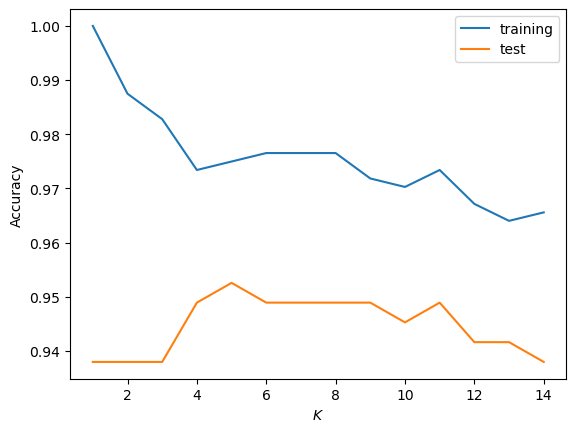

In [36]:
## Plotting results

nn = [ clasf.n_neighbors for clasf in classifiers]

plt.plot(nn, accuracies_train, label='training')
plt.plot(nn, accuracies_test, label='test')

plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Question: What do you notice? 
<br>
<details>
<summary>Click for answer</summary>
When the training accuracy is much larger (and close to 1) than the test then we have overfitting, the model follows the training data and it doesn't generalize well, i.e. it performs poorly with new data. (Check ML Practises to see how to solve this.)

With increasing K the test accuracy increases (especially as we add more and more classes and bands) which means that it starts to perform better.
</details>
